In [1]:
%pip install pandas_datareader
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

yf.pdr_override()

# For time stamps
from datetime import datetime
from keras.models import load_model

In [3]:
model = load_model("lstm_model.h5")

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'TSLA', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'TSLA', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, TSLA, AMZN]
company_name = ["APPLE", "GOOGLE", "TESLA", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,AMAZON
2024-03-15,176.639999,177.929993,173.899994,174.419998,174.419998,72115500,AMAZON
2024-03-18,175.800003,176.690002,174.279999,174.479996,174.479996,31250700,AMAZON
2024-03-19,174.220001,176.089996,173.520004,175.899994,175.899994,26880900,AMAZON
2024-03-20,176.139999,178.529999,174.639999,178.149994,178.149994,29947200,AMAZON
2024-03-21,179.990005,181.419998,178.149994,178.149994,178.149994,32824300,AMAZON
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100,AMAZON
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,AMAZON


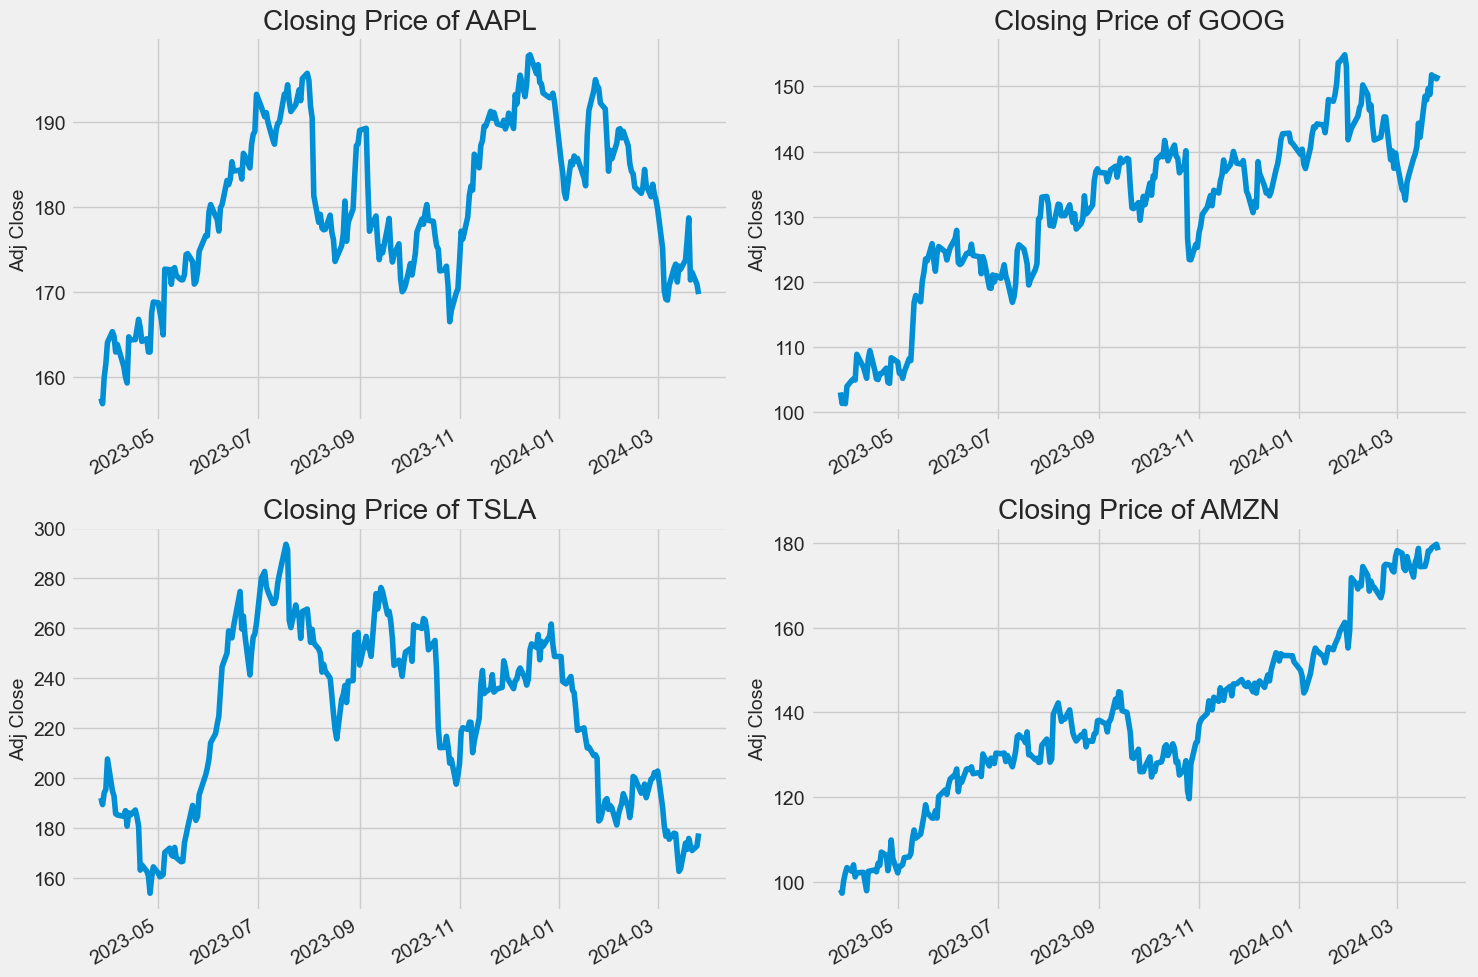

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

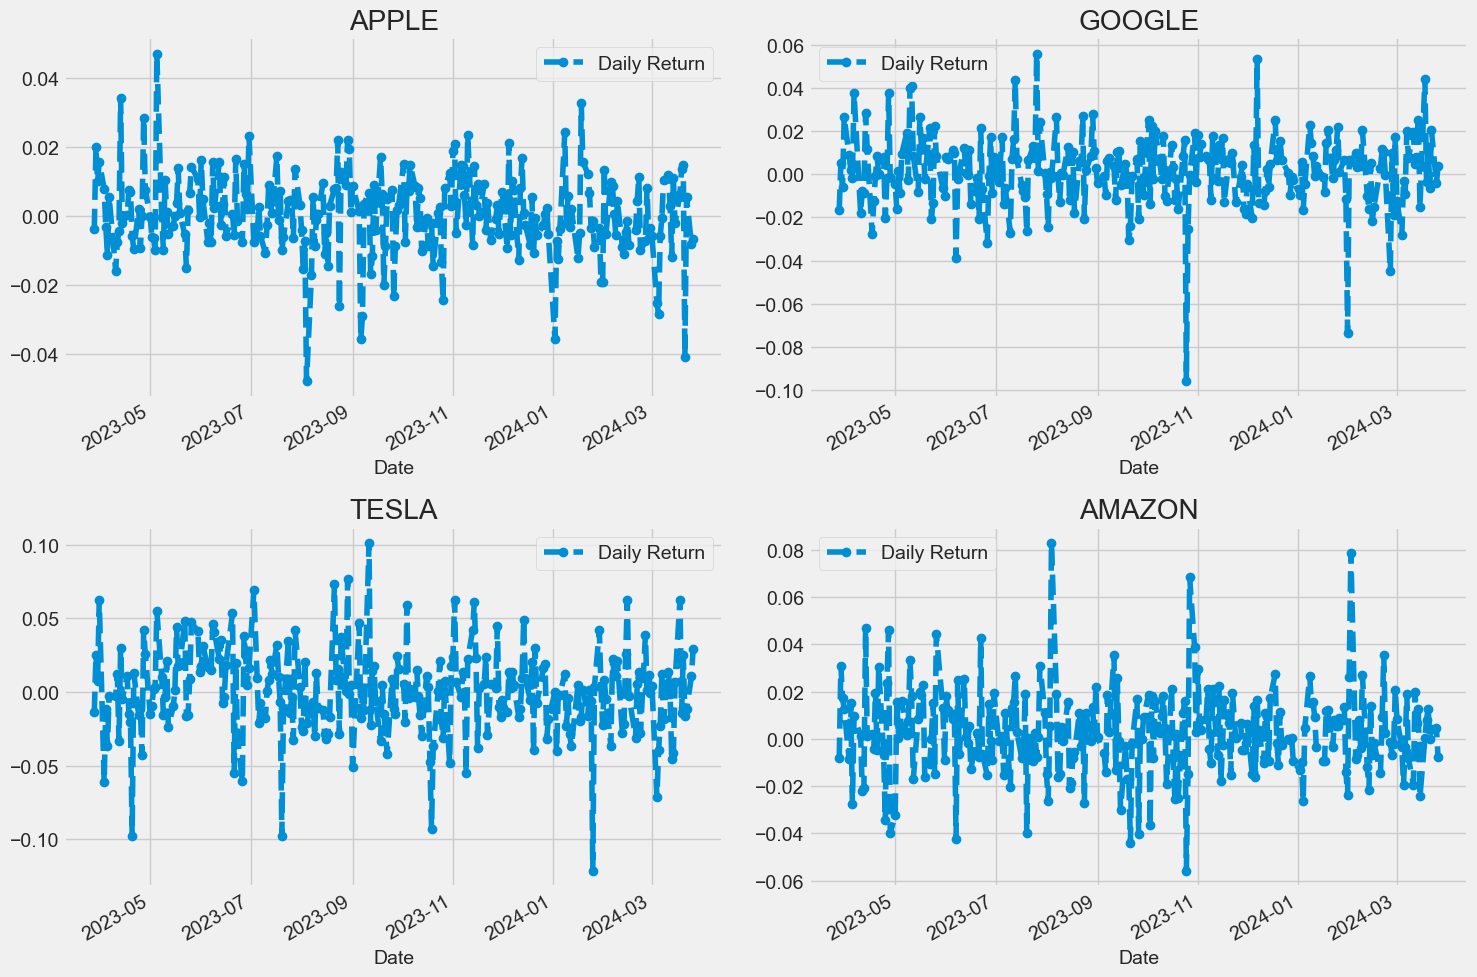

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [8]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,TSLA
Date,,,,
2023-03-27,NaN,NaN,NaN,NaN
2023-03-28,-0.003980,-0.008160,-0.016495,-0.013659
2023-03-29,0.019791,0.030954,0.005328,0.024790
2023-03-30,0.009890,0.017456,-0.005692,0.007221
2023-03-31,0.015644,0.012647,0.026451,0.062372


Text(0.5, 1.0, 'Correlation of stock closing price')

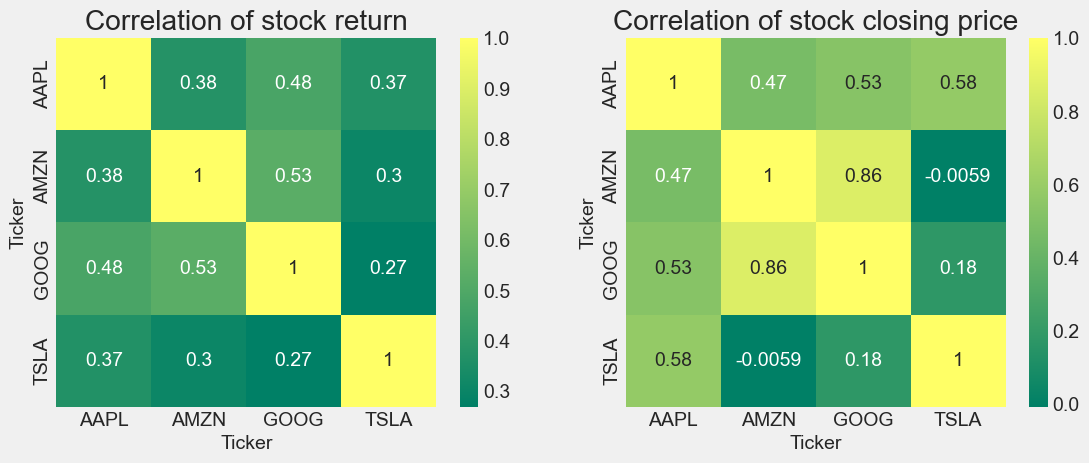

In [9]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Risk for AAPL: 0.012165781824036326
Risk for AMZN: 0.018883949265002246
Risk for GOOG: 0.017221397168979767
Risk for TSLA: 0.03024321801791042


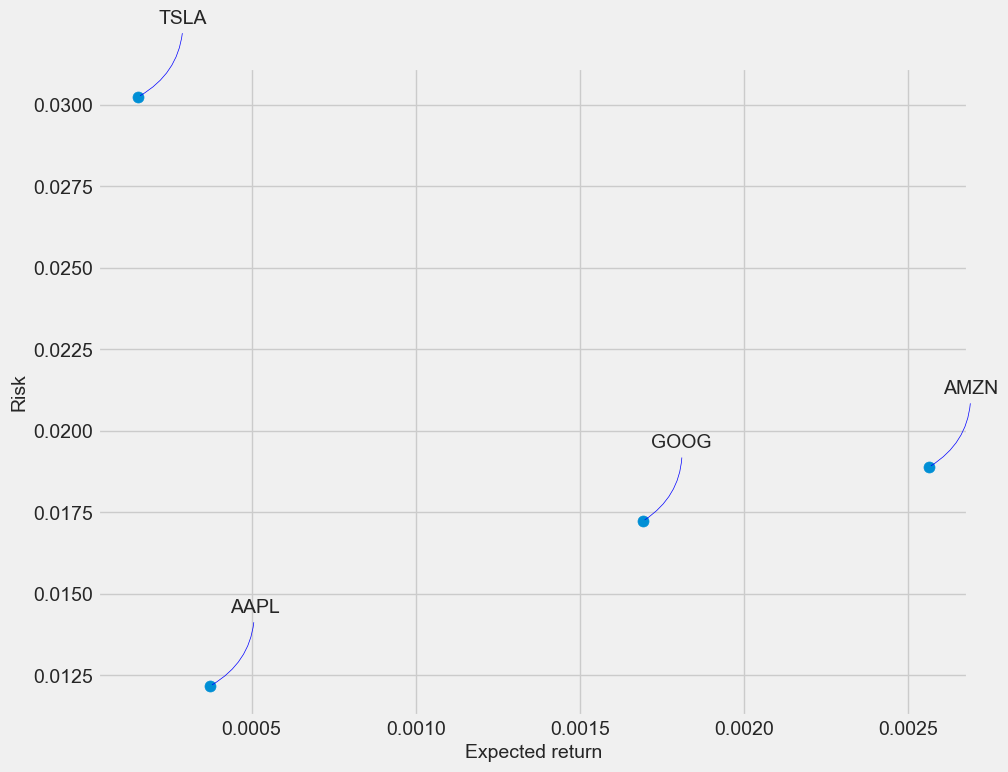

In [10]:
#how much value of risk we put by investing in that particular stock.
import numpy as np
import matplotlib.pyplot as plt

# Assuming `tech_rets` is a DataFrame containing returns of different tech stocks

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
    # Print risk values for each stock
    print(f"Risk for {label}: {y}")

plt.show()


In [11]:
# Get the stock quote
def get_stock_choice():
    # List of available stock symbols
    stock_list = ['AAPL', 'GOOG', 'TSLA', 'AMZN']
    
    # Prompt the user to select a stock
    print("Which stock would you like to see?")
    print("Available options:", ", ".join(stock_list))
    
    # Get user input and ensure it's a valid stock symbol
    while True:
        stock_choice = input("Enter the stock symbol: ").strip().upper()
        if stock_choice in stock_list:
            return stock_choice

company =  get_stock_choice()
df = pdr.get_data_yahoo(company , start='2012-01-01', end=datetime.now())
# Show teh data
df

Which stock would you like to see?
Available options: AAPL, GOOG, TSLA, AMZN
Enter the stock symbol: AAPL


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639425,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771560,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,106181300
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600


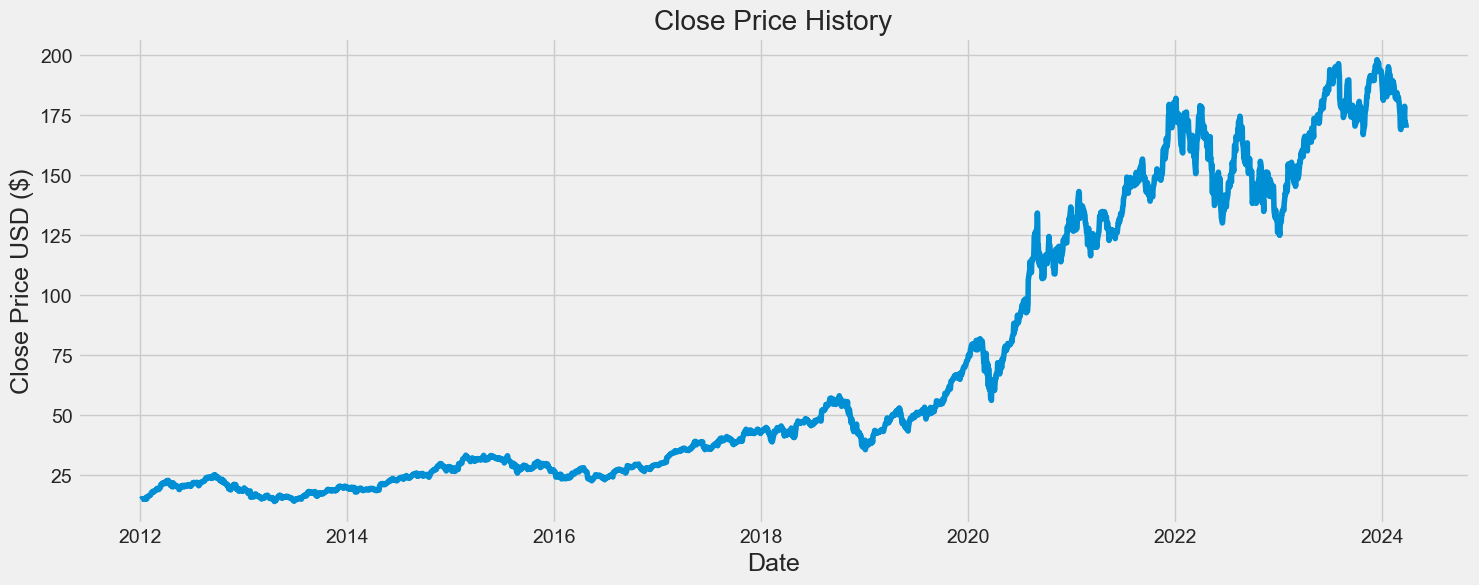

In [12]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [13]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 11ms/step


4.946417733120715

STOCK PRICE PREDICTION USING LSTM


C:\Users\SAJAN\AppData\Local\Temp\ipykernel_2456\127825296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


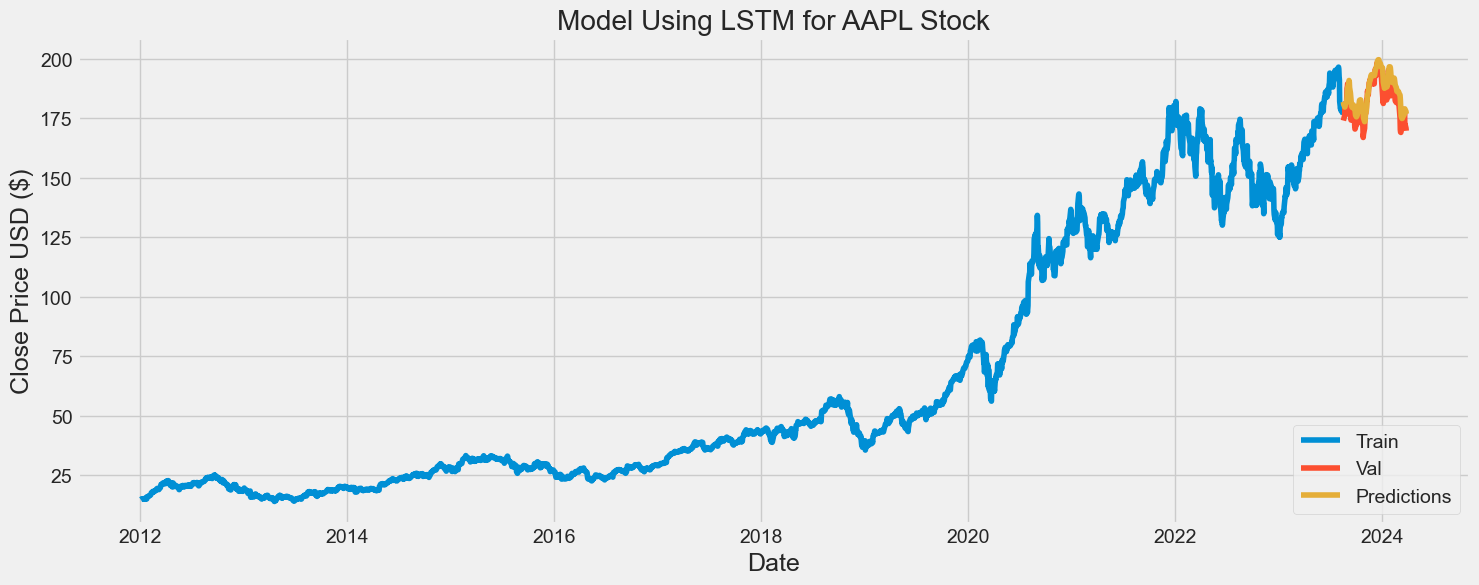

In [15]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model Using LSTM for ' + company + ' Stock')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

STOCK PRICE PREDICTION USING SVM

C:\Users\SAJAN\AppData\Local\Temp\ipykernel_2456\3288343390.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['SVM Predictions'] = svm_predictions


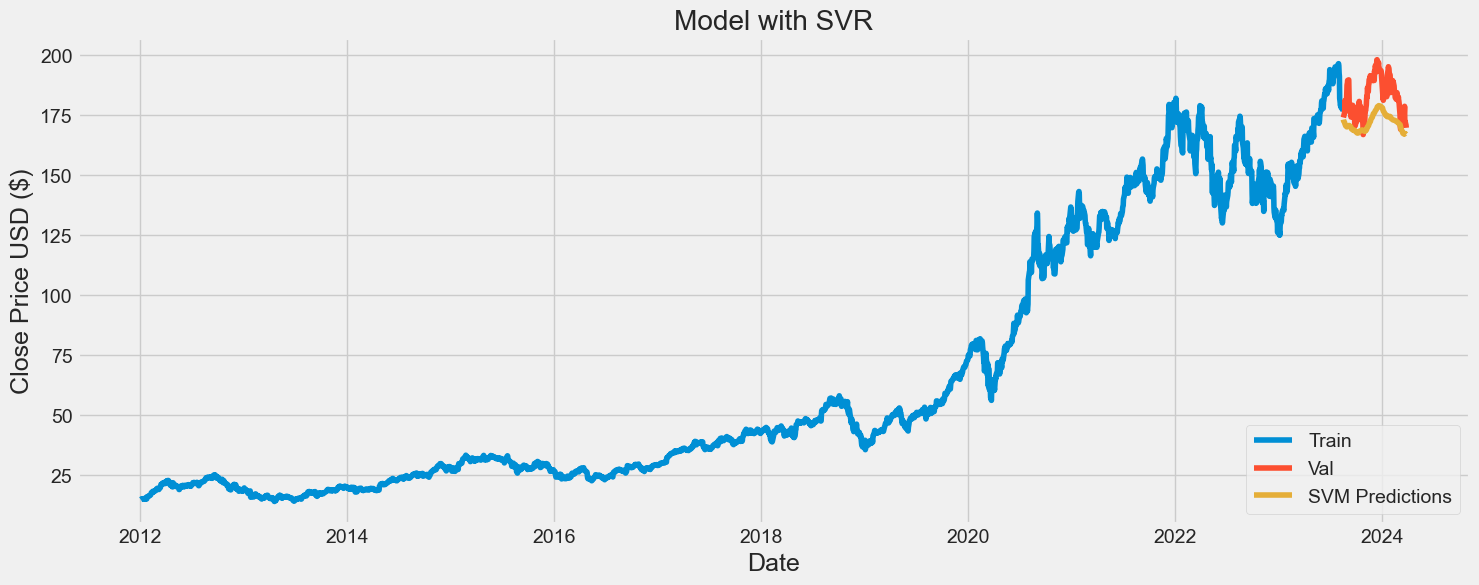

In [20]:
# Import SVM from scikit-learn
from sklearn.svm import SVR

# 1. Prepare the data
# We'll use the same 'Close' prices data as before
data = df.filter(['Close'])
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Prepare the training data
training_data_len = int(np.ceil(len(dataset) * 0.95))
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))

# 2. Train the SVM model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

# 3. Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

# 4. Make predictions using the trained model
svm_predictions = svr_rbf.predict(x_test)
svm_predictions = svm_predictions.reshape(-1, 1)
svm_predictions = scaler.inverse_transform(svm_predictions)

# 5. Visualize the predictions
train = data[:training_data_len]
valid = data[training_data_len:]
valid['SVM Predictions'] = svm_predictions

plt.figure(figsize=(16,6))
plt.title('Model with SVR')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'SVM Predictions']])
plt.legend(['Train', 'Val', 'SVM Predictions'], loc='lower right')
plt.show()


STOCK PRICE PREDICTION USING RANDOM FOREST.

C:\Users\SAJAN\AppData\Local\Temp\ipykernel_2456\2223046997.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['RF Predictions'] = rf_predictions


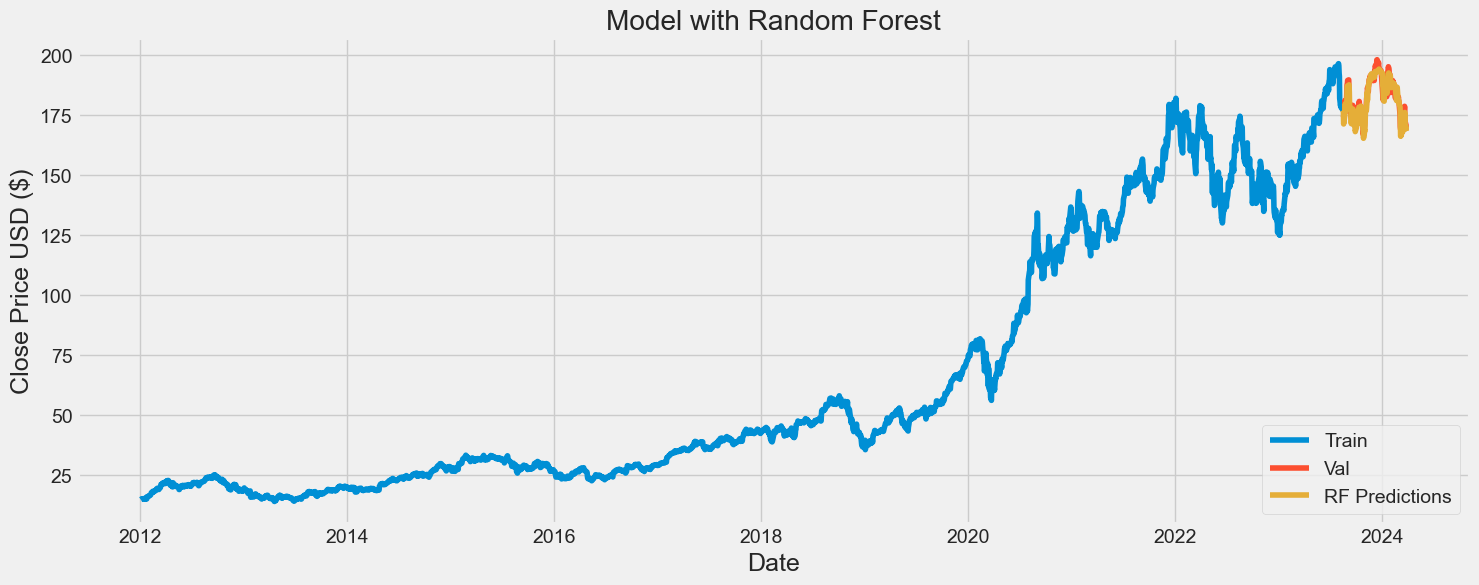

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

# Make predictions using the trained Random Forest model
rf_predictions = rf_regressor.predict(x_test)
rf_predictions = rf_predictions.reshape(-1, 1)
rf_predictions = scaler.inverse_transform(rf_predictions)

# Visualize the predictions made by Random Forest
valid['RF Predictions'] = rf_predictions

plt.figure(figsize=(16,6))
plt.title('Model with Random Forest')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'RF Predictions']])
plt.legend(['Train', 'Val', 'RF Predictions'], loc='lower right')
plt.show()



STOCK PRICE PREDICTION USING GRADIENT BOOSTING REGRESSOR

C:\Users\SAJAN\AppData\Local\Temp\ipykernel_2456\4092247895.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['GB Predictions'] = gb_predictions


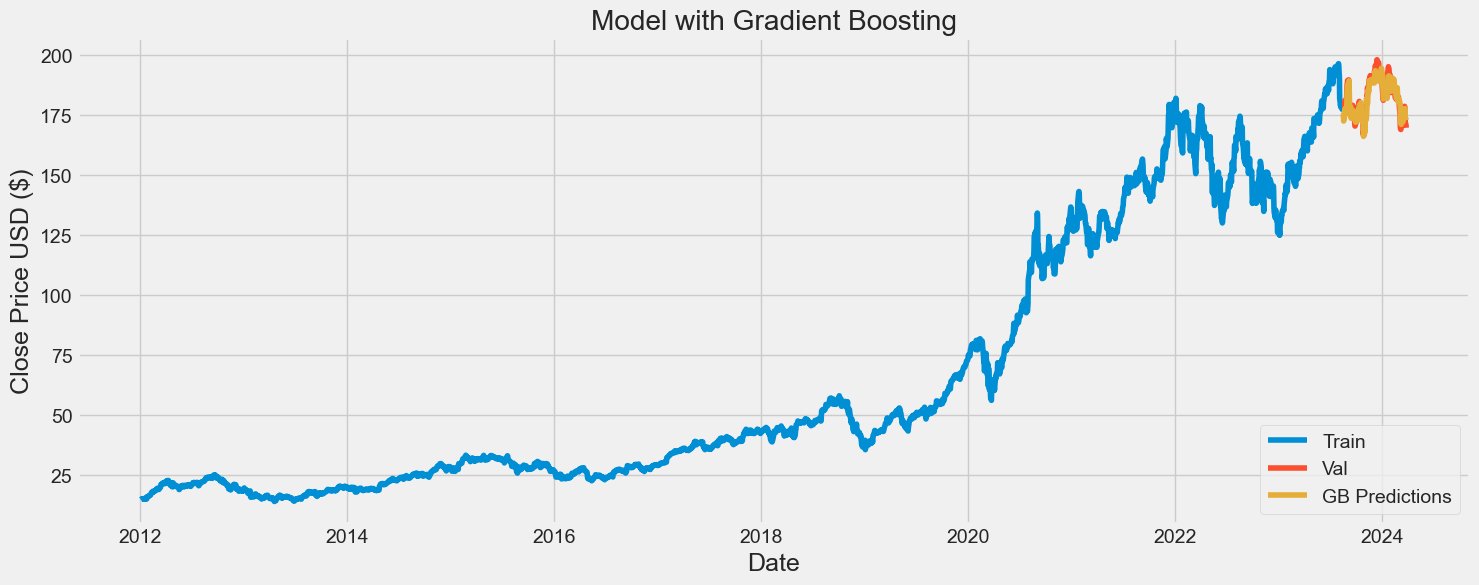

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(x_train, y_train)

# Make predictions using the trained Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)
gb_predictions = gb_predictions.reshape(-1, 1)
gb_predictions = scaler.inverse_transform(gb_predictions)

# Visualize the predictions made by Gradient Boosting
valid['GB Predictions'] = gb_predictions

plt.figure(figsize=(16,6))
plt.title('Model with Gradient Boosting')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'GB Predictions']])
plt.legend(['Train', 'Val', 'GB Predictions'], loc='lower right')
plt.show()


OVERALL ERRORS

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate LSTM model
lstm_mse = mean_squared_error(y_test, predictions)
lstm_mae = mean_absolute_error(y_test, predictions)
lstm_rmse = np.sqrt(lstm_mse)

print("LSTM Metrics:")
print("MSE:", lstm_mse)
print("MAE:", lstm_mae)
print("RMSE:", lstm_rmse)

# Evaluate SVR model
svr_mse = mean_squared_error(y_test, svm_predictions)
svr_mae = mean_absolute_error(y_test, svm_predictions)
svr_rmse = np.sqrt(svr_mse)

print("\nSVR Metrics:")
print("MSE:", svr_mse)
print("MAE:", svr_mae)
print("RMSE:", svr_rmse)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print("\nRandom Forest Metrics:")
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)

print("\nGradient Boosting Metrics:")
print("MSE:", gb_mse)
print("MAE:", gb_mae)
print("RMSE:", gb_rmse)


LSTM Metrics:
MSE: 24.467048390531072
MAE: 4.011696809257558
RMSE: 4.946417733120715

SVR Metrics:
MSE: 141.5549257409681
MAE: 10.559970848931725
RMSE: 11.89768573046742

Random Forest Metrics:
MSE: 7.350229437044029
MAE: 2.195120206346693
RMSE: 2.711130656579286

Gradient Boosting Metrics:
MSE: 9.526925621723333
MAE: 2.469062964780886
RMSE: 3.0865718235160724
